In [1]:
from glob import glob


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras import models, layers, callbacks
# from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd





import os 
import json
import PIL
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import albumentations as A
import seaborn as sns

import tensorflow as tf


In [2]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/KASHIF DEEP LEARNING/transfer learning/##GRAPH/root/model_00.h5')


In [3]:
from keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/drive/MyDrive/KASHIF DEEP LEARNING/transfer learning/ Jason Brownlee/dataBase/test'

validation_dir = '/content/drive/MyDrive/KASHIF DEEP LEARNING/transfer learning/ Jason Brownlee/dataBase/val'

train_dir = '/content/drive/MyDrive/KASHIF DEEP LEARNING/transfer learning/ Jason Brownlee/dataBase/train'



image_size=[263,173]


# datagen = ImageDataGenerator(rescale=1.0/255)
# train_generator = datagen.flow_from_directory(train_dir, class_mode='categorical', batch_size=32,target_size=image_size)
# valid_generator = datagen.flow_from_directory(validation_dir, class_mode='categorical', batch_size=32,target_size=image_size)
# test_generator = datagen.flow_from_directory(test_dir, class_mode='categorical', batch_size=32,target_size=image_size)

In [4]:

import os 
import json
import PIL
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import albumentations as A
import seaborn as sns

**MODEL STATRT**

In [5]:
image_dir = Path(train_dir)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepaths').astype(str)
labels = pd.Series(labels, name='Labels')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Drop GT images
image_df = image_df[image_df['Labels'].apply(lambda x: x[-2:] != 'GT')]

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head()

,Filepaths,Labels
0,/content/drive/MyDrive/KASHIF DEEP LEARNING/tr...,apr
1,/content/drive/MyDrive/KASHIF DEEP LEARNING/tr...,aug
2,/content/drive/MyDrive/KASHIF DEEP LEARNING/tr...,jul
3,/content/drive/MyDrive/KASHIF DEEP LEARNING/tr...,may
4,/content/drive/MyDrive/KASHIF DEEP LEARNING/tr...,sep


In [6]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.85, shuffle=True, random_state=1)

In [7]:
image_size=[263,173]


train_generator = ImageDataGenerator(rescale=1.0/255 , 
                             validation_split=0.15)




test_generator = ImageDataGenerator(
    rescale = 1.0/255,

)











# train_generator = datagen.flow_from_directory(train_dir, class_mode='categorical', batch_size=32,target_size=image_size)
# valid_generator = datagen.flow_from_directory(validation_dir, class_mode='categorical', batch_size=32,target_size=image_size)
# test_generator = datagen.flow_from_directory(test_dir, class_mode='categorical', batch_size=32,target_size=image_size)

In [8]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 3035 validated image filenames belonging to 12 classes.


In [9]:
val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 535 validated image filenames belonging to 12 classes.


In [10]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)

Found 630 validated image filenames belonging to 12 classes.


In [11]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from keras.applications.vgg16 import VGG16

image_size=[263,173]

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(263,173, 3))




58900480/58889256 [==============================] - 1s 0us/step


In [12]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
# add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(12, activation='softmax'))

In [14]:

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))


In [15]:


model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True) ,
              metrics=['accuracy'] ,)

In [16]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path='/content/drive/MyDrive/KASHIF DEEP LEARNING/transfer learning/##GRAPH/Fibal/weifgt_00.h5'

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [20]:
# history  = model.fit(


#                      train_images,
#                      batch_size=32,
#                      epochs=100,
#                      verbose='auto',
#                      callbacks=callbacks_list,
#                      validation_split=0.0, 
#                      validation_data=val_images,
#                      shuffle=True,
#                      class_weight=None,
#                      sample_weight=None,
#                      initial_epoch=0,
#                      steps_per_epoch=3035/32,
#                      validation_steps=535/32,
#                      validation_batch_size=None,
#                      validation_freq=1,
#                      max_queue_size=10,
#                      workers=1,
#                      use_multiprocessing=False)




history = model.fit(train_images, validation_data=val_images, epochs=100, callbacks=callbacks_list)

Epoch 1/100
48/48 [==============================] - ETA: 0s - loss: 1.6549 - accuracy: 0.7736
Epoch 00001: val_loss improved from 7.96766 to 0.39601, saving model to /content/drive/MyDrive/KASHIF DEEP LEARNING/transfer learning/##GRAPH/Fibal/weifgt_00.h5
48/48 [==============================] - 28s 573ms/step - loss: 1.6549 - accuracy: 0.7736 - val_loss: 0.3960 - val_accuracy: 0.8879 - lr: 0.0100
Epoch 2/100
48/48 [==============================] - ETA: 0s - loss: 0.3306 - accuracy: 0.8956
Epoch 00002: val_loss improved from 0.39601 to 0.15772, saving model to /content/drive/MyDrive/KASHIF DEEP LEARNING/transfer learning/##GRAPH/Fibal/weifgt_00.h5
48/48 [==============================] - 26s 547ms/step - loss: 0.3306 - accuracy: 0.8956 - val_loss: 0.1577 - val_accuracy: 0.9495 - lr: 0.0100
Epoch 3/100
48/48 [==============================] - ETA: 0s - loss: 0.2308 - accuracy: 0.9245
Epoch 00003: val_loss did not improve from 0.15772
48/48 [==============================] - 25s 523ms/s

In [21]:
model.save('/content/drive/MyDrive/KASHIF DEEP LEARNING/transfer learning/##GRAPH/Fibal/model_00.h5')

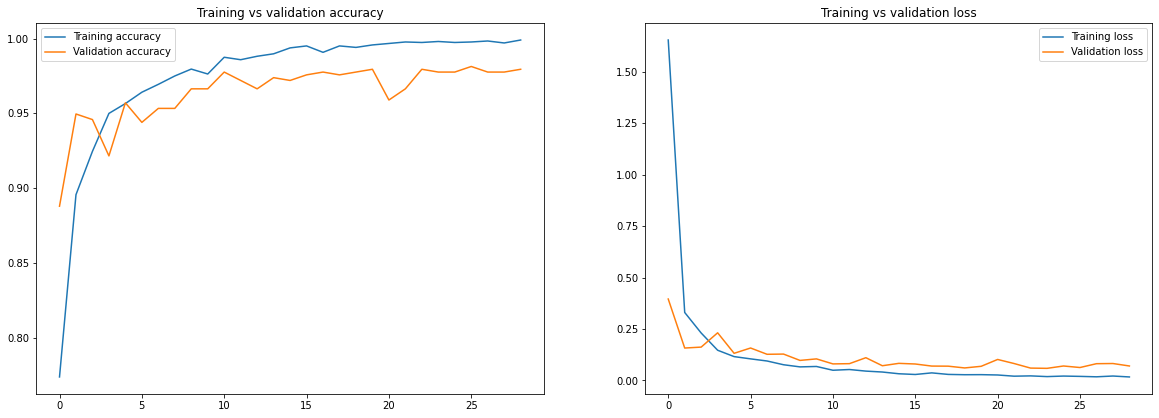

In [22]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [23]:
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)

labels = train_images.class_indices
labels = dict((v,k) for k, v in labels.items())

print(labels)
print(pred)

{0: 'apr', 1: 'aug', 2: 'dec', 3: 'feb', 4: 'jan', 5: 'jul', 6: 'jun', 7: 'mar', 8: 'may', 9: 'nov', 10: 'oct', 11: 'sep'}
[ 8  6  3  4  7  5  0  7  8 10  6  2  9 10  8  9  4  4  3  2  4  7  2  9
  3  5 11  0  0 10  6  1  5  0  5  0  9  5  7  4 11  4  3 10  5  4  8 10
  9  8  4  7  0  0  2  4 11  5  8  6  3 10  6  2  8  3  9  1  6  3  1  2
  7  8  2  1  8  1  6  0 11  3  2  5 11  8  0  7  3  6  2  6  5  2  5  7
  2  3  7  9 11  2  8 11  2  7 10  7  1  3 10  3  2  3  9  4  0  5  1  1
 10 10  7  4  8  3  3  8  0  0  3  3 11  7  5  7 11  2  2  1  0  8  1  4
  9  8  2  3  6 11  6  2  9  2 11  6 11  9  8 11  2  0  6  6  1  8  2  4
  9 11  6  1  8  8  2 11  7 11  9  7  3  3  5 11  5  2  4  3  6  1  3 10
  1  7  2  3 11  8  6 11  2  6 10  1  7  6  5  2  3 10  4  8  4 10  0  5
 10  8  0  4  4  3  6 10  9  4  5  9  4  9  6  9  1  3 11  5  4 11  0  5
  7  1  6  6  3  7  0  0  4  0  8  7  5  7  7  9  3 11  8  7  1  2  5  2
  8 11  4  5  8  6  6  7  1  0  2  2  8  8  0  1  1 10 11  2  2  8  9  5
 

In [24]:
y_pred = [labels[k] for k in pred]

In [25]:
print(classification_report(test_df.Labels, y_pred))

              precision    recall  f1-score   support

         apr       0.98      1.00      0.99        48
         aug       1.00      0.92      0.96        50
         dec       1.00      0.93      0.96        59
         feb       0.91      1.00      0.95        53
         jan       0.98      0.96      0.97        55
         jul       0.96      0.98      0.97        54
         jun       0.94      1.00      0.97        47
         mar       1.00      0.95      0.97        58
         may       1.00      0.97      0.98        60
         nov       0.96      0.96      0.96        45
         oct       0.98      0.96      0.97        51
         sep       0.91      1.00      0.95        50

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630



In [26]:
print(confusion_matrix(test_df.Labels, y_pred))

[[48  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  1  1  0  2  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0  0  4]
 [ 0  0  0 53  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 53  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0  0  0]
 [ 1  0  0  0  0  1  1 55  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 58  1  0  0]
 [ 0  0  0  1  0  0  0  0  0 43  1  0]
 [ 0  0  0  0  0  0  0  0  0  1 49  1]
 [ 0  0  0  0  0  0  0  0  0  0  0 50]]
